<a href="https://colab.research.google.com/github/rohitrv8922/global-terrorism-analysis/blob/main/Rohit_Verma_(_Global_Terrorism_Analysis_EDA_Capstone_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

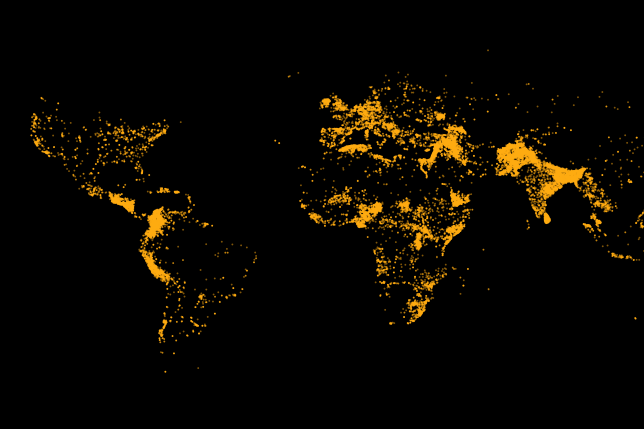

“The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation.

The Global Terrorism Analysis is the most comprehensive unclassified database of terrorist attacks in the world. The National Consortium for the Study of Terrorism and Responses to Terrorism (START) makes the GTA available to improve understanding of terrorist violence, so that it can be more readily studied and defeated. 

**Loading Necessary libraries**

In [90]:
#import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from scipy import signal
import plotly.express as px

**Loading drive into Google colab notebook**

In [91]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Loading Dataset:-**

In [92]:
file_path= '/content/drive/My Drive/'
data_df=pd.read_csv(file_path + 'global_data.csv',encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Now cecking the Dataset into more detail**

In [93]:
data_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [94]:
terror_data=data_df.copy()
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [95]:
terror_data.shape


(181691, 135)

In [96]:
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [97]:
terror_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [98]:
terror_data.count

<bound method DataFrame.count of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -

Here i can cleaerly saw that the mean of the countries with crime rate is approximately 132 and total is 181691.

#Data Preparation and Cleaning the data


**Now,check for any null values or unnecessary values**

In [99]:
terror_data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [100]:
nan_values=terror_data.isna()
nan_columns=nan_values.any()


columns_with_nan=terror_data.columns[nan_columns].tolist()
columns_with_nan

['approxdate',
 'resolution',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'location',
 'summary',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',


**There are so many columns,lets explore and process them one by one**

In [101]:
terror_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','success':'Success','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)


So first lets find the data type of each

**I dont need all columns because some are unnecessary**
I need only those columns for considerations which are necessary for the analysis

In [102]:
terror_data=terror_data[['Year','Month','Day','Country','Success','Region','City','Latitude','Longitude','AttackType','Killed',
              'Wounded','Target','Group','Target_type','Weapon_type','Motive']]

terror_data['casualties']=terror_data['Killed']+terror_data['Wounded']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [103]:
terror_data.head()

,Year,Month,Day,Country,Success,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,casualties
0,1970,7,2,Dominican Republic,1,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,1,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,1,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,1,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [104]:
terror_data.count()

Year           181691
Month          181691
Day            181691
Country        181691
Success        181691
Region         181691
City           181257
Latitude       177135
Longitude      177134
AttackType     181691
Killed         171378
Wounded        165380
Target         181055
Group          181691
Target_type    181691
Weapon_type    181691
Motive          50561
casualties     164817
dtype: int64

**Now again i am checking for any null values:-**

In [105]:
terror_data.isna().sum()

Year                0
Month               0
Day                 0
Country             0
Success             0
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualties      16874
dtype: int64

Now i found that some null values are present but fewer than above table:

In [106]:
#missing percentage
missing_per=terror_data.isnull().sum()*100/len(terror_data)
missing_per

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
Success         0.000000
Region          0.000000
City            0.238867
Latitude        2.507554
Longitude       2.508104
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Target          0.350045
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
casualties      9.287196
dtype: float64

**Heat map to visualize the null values presence:-**

<Figure size 432x360 with 0 Axes>

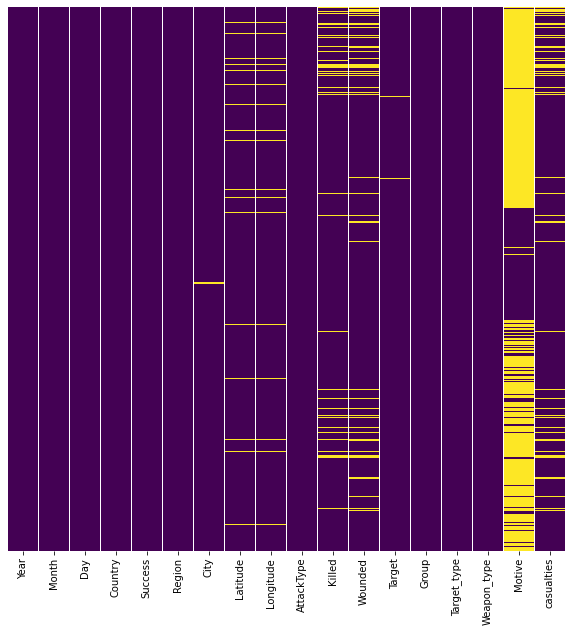

In [141]:
plt.figure(figsize=(6,5))
plt.figure(figsize=(10,10))
sns.heatmap(terror_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Conclusion on heatmap**

Columns with the null values are


*   state
*   city
*   latitude
*   longitude
*   kill
*   wound
*   summary
*   motive


**Correlation between columns in the dataset**

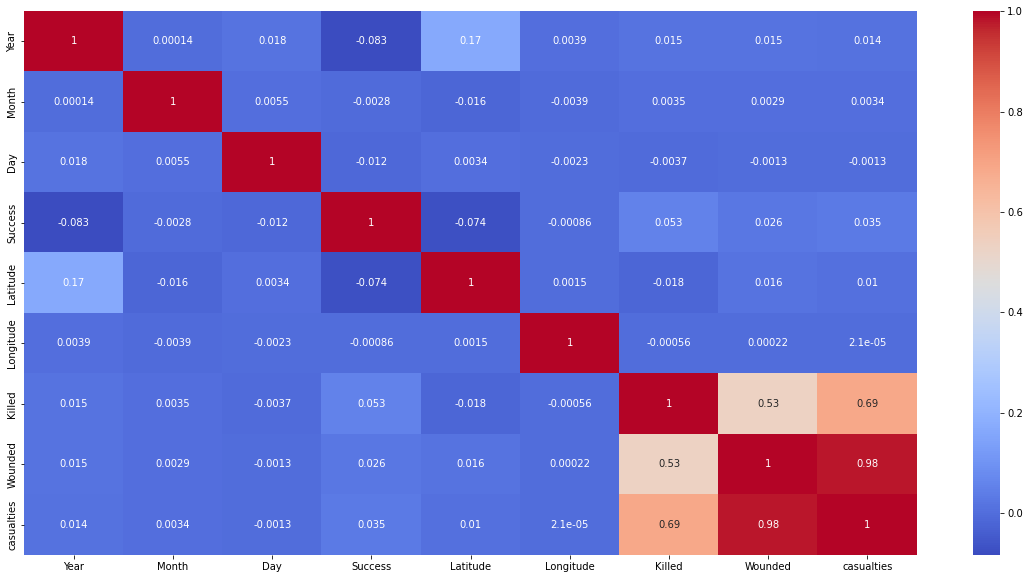

In [146]:
plt.subplots(figsize=(20,10))
sns.heatmap(terror_data.corr(),annot=True,cmap='coolwarm')

#Data Visualization

**Analyzing the data**

In [112]:
print('Country with the hightest terrorist attack rate:',terror_data['Country'].value_counts().index[0])
print('Year with the most attacks:',terror_data['Year'].value_counts().idxmax())
print('Year with the least attack:',terror_data['Year'].value_counts().idxmin())
print('Most active terrorist group:',terror_data['Group'].value_counts().index[1])
print('Region with the hightest terrorist attack rate:',terror_data['Region'].value_counts().index[0])
print('Weapon in the region with the hightest terrorist attack:',terror_data['Weapon_type'].value_counts().index[0])
print('Maximum number of people who  killed in terrorist attacks are:',terror_data['Killed'].max(),'that took place in',terror_data.loc[terror_data['Killed'].idxmax()].Country)

Country with the hightest terrorist attack rate: Iraq
Year with the most attacks: 2014
Year with the least attack: 1971
Most active terrorist group: Taliban
Region with the hightest terrorist attack rate: Middle East & North Africa
Weapon in the region with the hightest terrorist attack: Explosives
Maximum number of people who  killed in terrorist attacks are: 1570.0 that took place in Iraq


#Terrorism attacks and their activities

---



Motive behind the terrorist attacks and terrorism

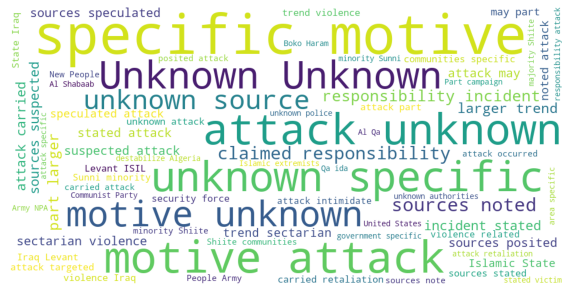

In [113]:
south_data=terror_data[terror_data['Motive'].notnull()].reset_index()

items=[]
for i in range(0,len(south_data)):
  text_data=south_data['Motive'][i].split(',')
  text_data=','.join(text_data)
  items.append(text_data)
  text_data=','.join(items)
wordcloud=WordCloud(width=1000,height=500,background_color='white',min_font_size=12).generate(text_data)  
plt.figure(figsize=(10,6),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Points to think!**

**Why the motive of the terrorism are unknown?What are we missing in the real life behind finding the motive of the attacks?**

**Graphical Representation of Terrorist Attack Globally**

In [114]:
terrorDf=terror_data.groupby(('Country'),as_index=False).count()
fig=px.choropleth(terrorDf,locations='Country',locationmode='country names',color='Year',hover_name='Country',
                    projection='orthographic',title='People deaths in Countries',labels={'Year':'New nkill'})
fig.show()

Number of Terrorist Activities vs Year of attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



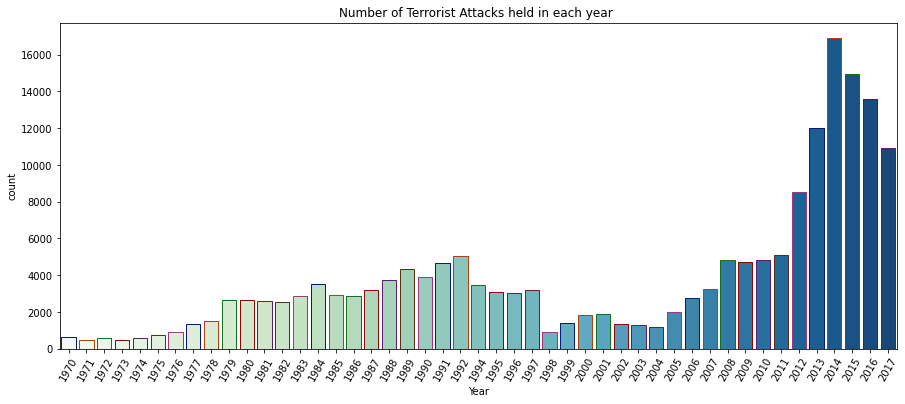

In [115]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_data,palette='GnBu',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=60)
plt.title('Number of Terrorist Attacks held in each year ')
plt.show()

**Remarks**

Eventhough measures and actions and taken by the government as well by the people terrorist activities are increasing year by year

**Attacking methods used by the terrorist** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



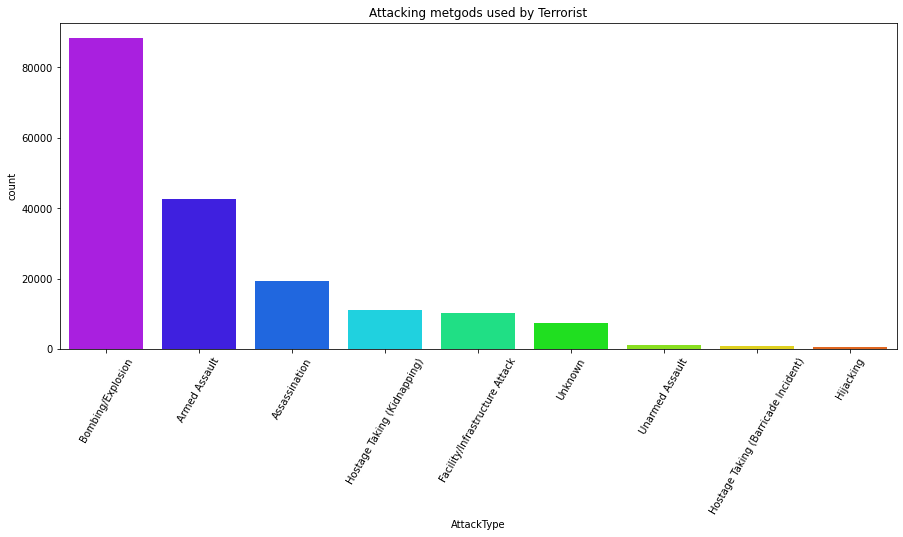

In [116]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror_data,palette='gist_rainbow_r',order=terror_data['AttackType'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Attacking metgods used by Terrorist')
plt.show()

**Who being the Targets?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



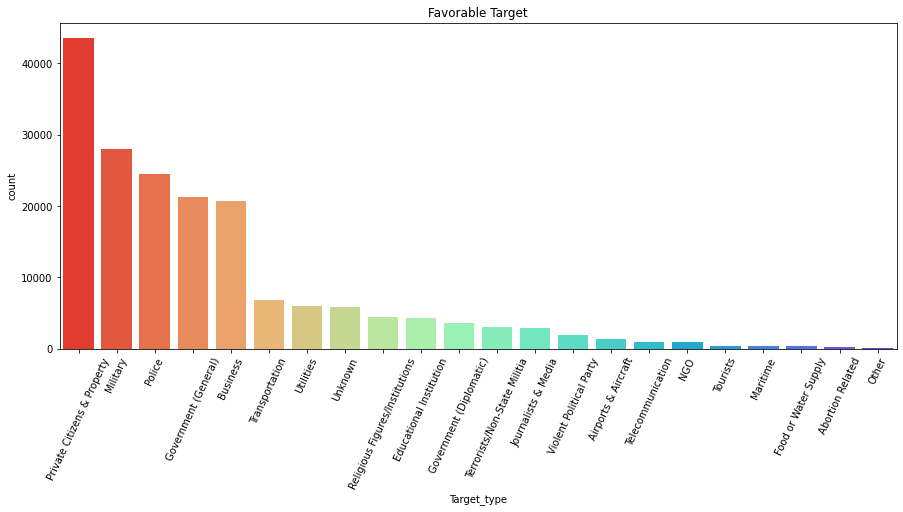

In [117]:
plt.subplots(figsize=(15,6))
sns.countplot(terror_data['Target_type'],palette='rainbow_r',order=terror_data['Target_type'].value_counts().index)
plt.xticks(rotation=65)
plt.title('Favorable Target')
plt.show()

**Remarks**

People and the properties are the  main targets of the terrorist.then come the military and policew  or government departments.Be aware and ready to fight back.  

# Main Hot Zones of terrorism

Text(0.5, 1.0, 'Continental Regions with Terrorist Attacks')

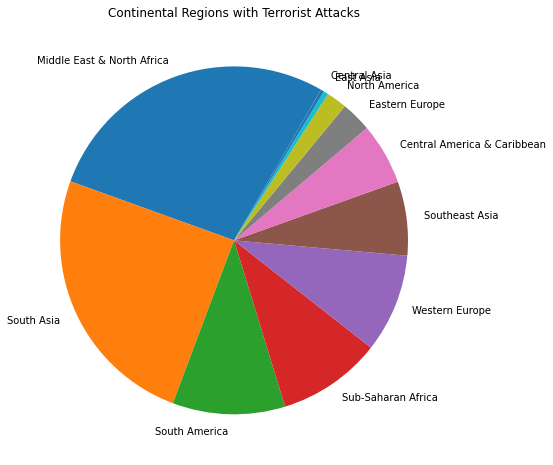

In [118]:
values=terror_data.Region.value_counts()[:11].values
labelsd=terror_data.Region.value_counts()[:11].index
plt.subplots(figsize=(8,8))
plt.pie(values,labels=labelsd,startangle=60)
plt.title('Continental Regions with Terrorist Attacks')

**From the above plot i can see that the Middle East and North America are the most affected region by terrorism**

<function matplotlib.pyplot.show>

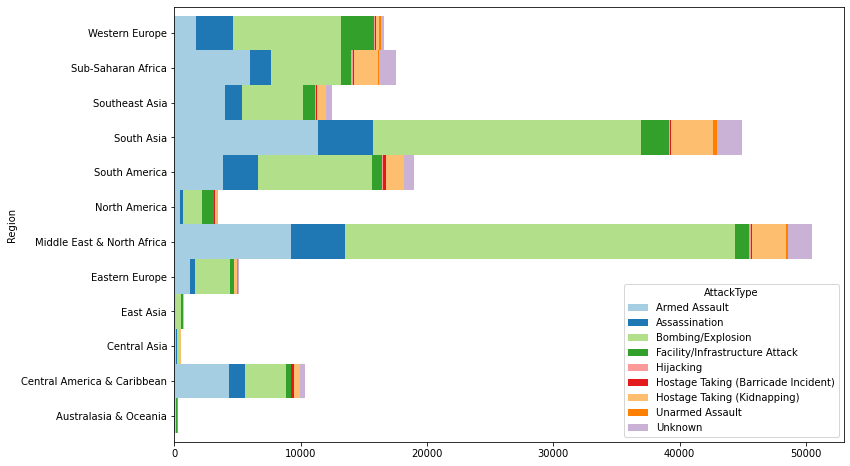

In [151]:
pd.crosstab(terror_data.Region,terror_data.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('Paired',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show

 **Activities by Region in each year**

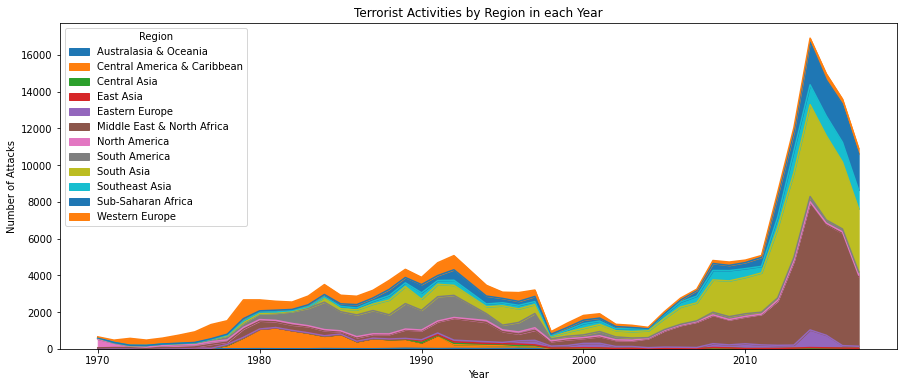

In [119]:
pd.crosstab(terror_data.Year,terror_data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

**Type of Attack Vs Region**

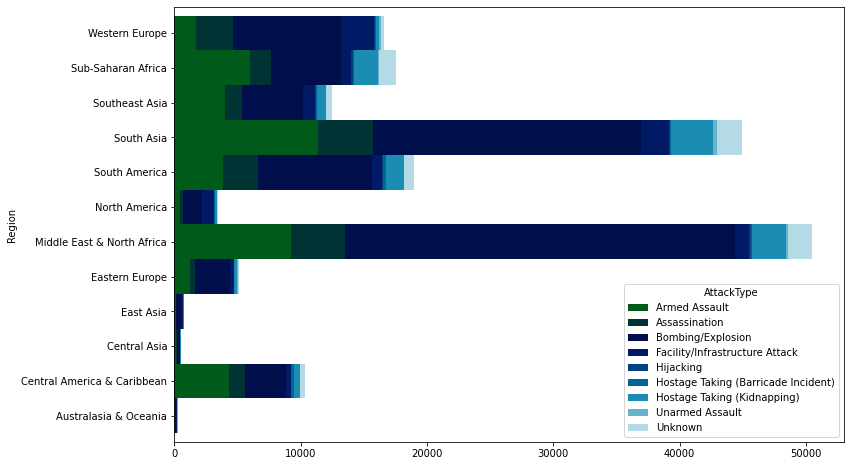

In [120]:
pd.crosstab(terror_data.Region,terror_data.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('ocean',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# Terrorism By Country

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



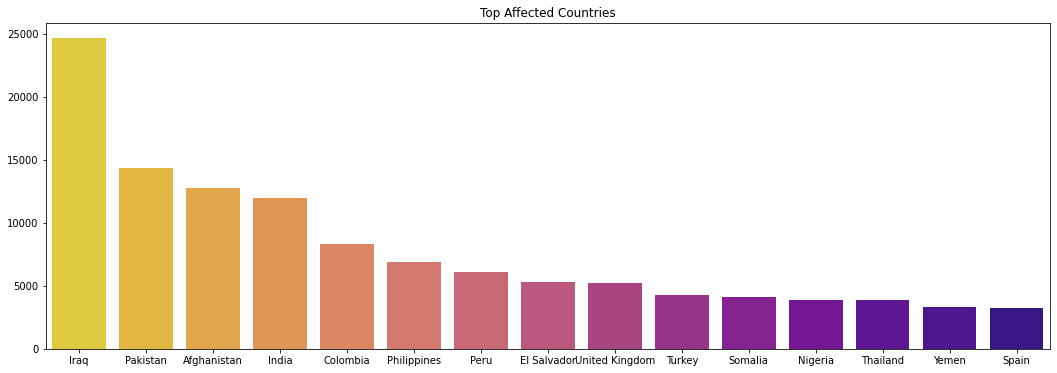

In [121]:
plt.subplots(figsize=(18,6))
sns.barplot(terror_data['Country'].value_counts()[:15].index,terror_data['Country'].value_counts()[:15].values,palette='plasma_r')
plt.title('Top Affected Countries')
plt.show()

**Remark**

Iraq stands first in terms of terrorism and terrorist activities(Based on the data from 1970 to 2017)

**Facts to know**

India's rank falling from 8th in 2017 and 2018 to 7th in 2019 which reflecting the worsening of the overall security situation in the country on the grounds of terrorism.

**Countries which are safe from Terror Attacks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



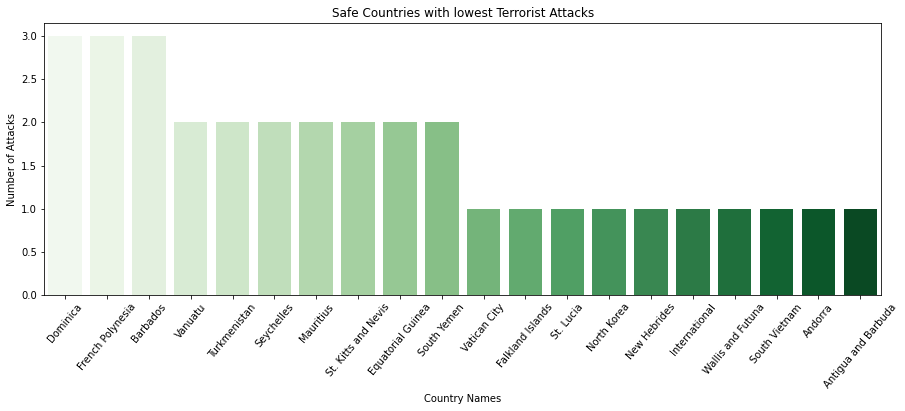

In [122]:
plt.subplots(figsize=(15,5))
sns.countplot(terror_data.Country,order=terror_data.Country.value_counts()[185:].index,palette='Greens')
plt.xticks(rotation=50)
plt.title('Safe Countries with lowest Terrorist Attacks')
plt.ylabel('Number of Attacks')
plt.xlabel('Country Names')
plt.show('Counts')

**Number of Attacks Vs Number of Killing**

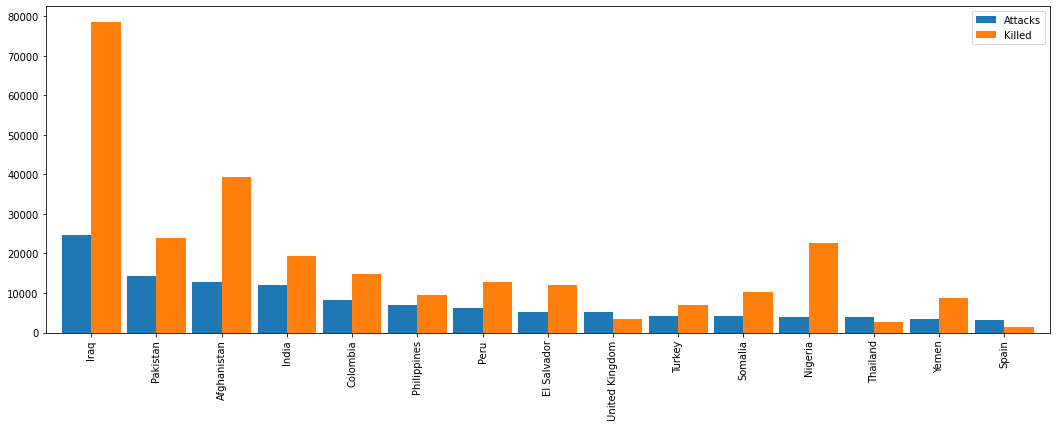

In [123]:
num_terror=terror_data['Country'].value_counts()[:15].to_frame()
num_terror.columns=['Attacks']
num_killed=terror_data.groupby('Country')['Killed'].sum().to_frame()
num_terror.merge(num_killed,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Number of Deaths in a year and the Responsible Extremists

**Success Rate of the Attacks across the world**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Attacks')

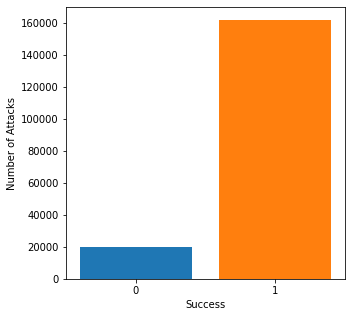

In [124]:
plt.subplots(figsize=(5,5))
sns.countplot(terror_data.Success,saturation=1)
plt.ylabel('Number of Attacks')

# Most active notorious groups which involves in the attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



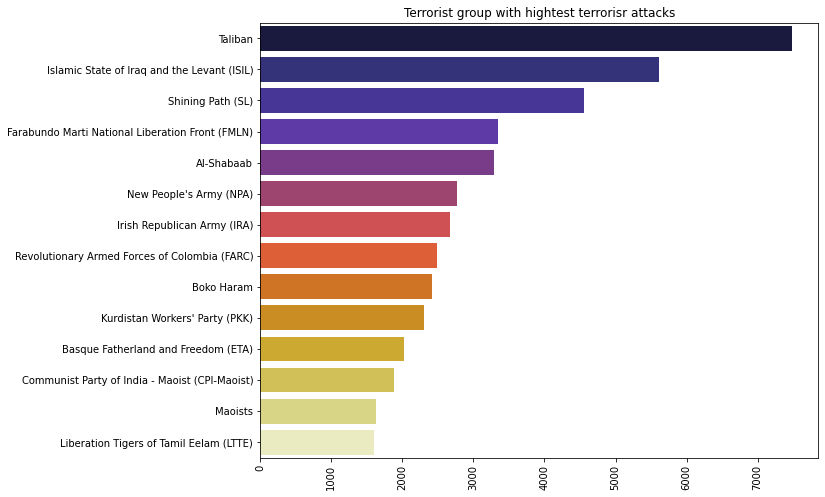

In [125]:
sns.barplot(terror_data['Group'].value_counts()[1:15].values,terror_data['Group'].value_counts()[1:15].index,palette=('CMRmap'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist group with hightest terrorisr attacks')
plt.show()

**Remark**

One who dosen't know Taliban interestingly,it's the one who is not even educated knows that Taliban is the wildest.EDA also concluded the same.Taliban is the most notorious group which has involved in many terrorist attacks.

# Top  10 Terrorist Groups Activities

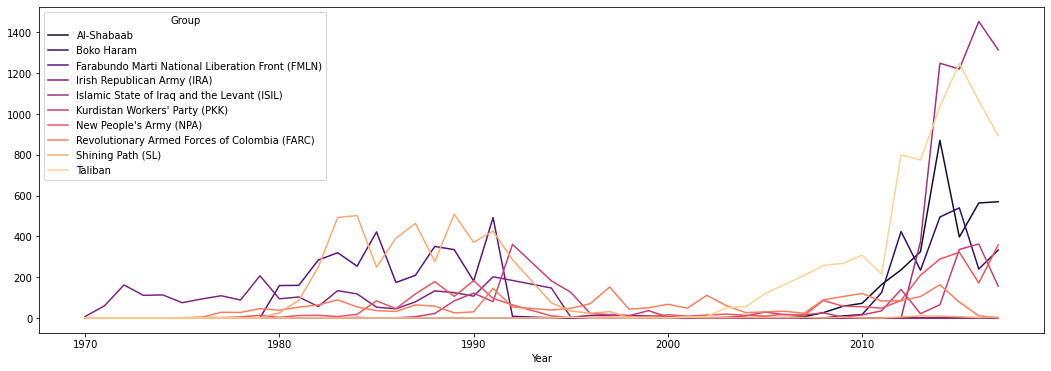

In [126]:
top_groups=terror_data[terror_data['Group'].isin(terror_data['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups.Year,top_groups.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

**From the above plot i can see that in the 2014,the maximum terrorist activities took place**

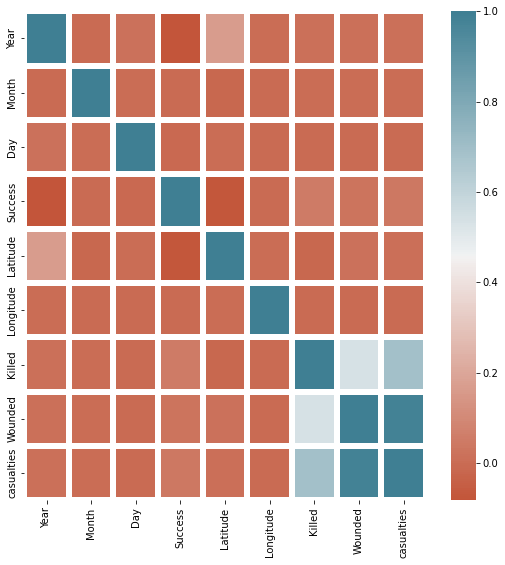

In [149]:
f,ax=plt.subplots(figsize=(9,9))
sns.heatmap(terror_data.corr(),annot=False,linewidths=5,fmt='1f=',cmap=sns.diverging_palette(20,220,n=220),ax=ax)

# Analysis on India

In [127]:
India=terror_data[terror_data.Country=='India']
India.head(5)

,Year,Month,Day,Country,Success,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,casualties
1186,1972,2,22,India,1,South Asia,New Delhi,28.585836,77.153336,Hijacking,0.0,0.0,B-747,Palestinians,Airports & Aircraft,Explosives,NaN,0.0
2764,1975,1,2,India,1,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.0,0.0,Lalit Narayan Mishra and a legislator,Ananda Marga,Government (General),Explosives,Unknown,4.0
3857,1976,5,26,India,1,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0.0,0.0,New Delhi airport,Unknown,Airports & Aircraft,Explosives,NaN,0.0
5327,1977,9,28,India,1,South Asia,Bombay,19.075984,72.877656,Hijacking,0.0,0.0,DC-8,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,0.0
7337,1979,1,13,India,1,South Asia,Unknown,26.200605,92.937574,Armed Assault,NaN,NaN,patrol,Naga People,Police,Firearms,NaN,NaN


In [128]:
India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11960 entries, 1186 to 181689
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11960 non-null  int64  
 1   Month        11960 non-null  int64  
 2   Day          11960 non-null  int64  
 3   Country      11960 non-null  object 
 4   Success      11960 non-null  int64  
 5   Region       11960 non-null  object 
 6   City         11960 non-null  object 
 7   Latitude     11801 non-null  float64
 8   Longitude    11801 non-null  float64
 9   AttackType   11960 non-null  object 
 10  Killed       11740 non-null  float64
 11  Wounded      11506 non-null  float64
 12  Target       11918 non-null  object 
 13  Group        11960 non-null  object 
 14  Target_type  11960 non-null  object 
 15  Weapon_type  11960 non-null  object 
 16  Motive       5685 non-null   object 
 17  casualties   11490 non-null  float64
dtypes: float64(5), int64(4), object(9)
memory 

In [129]:
India.Success.value_counts()

1    10280
0     1680
Name: Success, dtype: int64

Insight:- 10280  successful terrorist strike has taken place in India while 1680 attempts failed from 1970-2017

In [130]:
India.Year.value_counts().index.sort_values()

Int64Index([1972, 1975, 1976, 1977, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
            1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64')

**Terrorist Attacks in India**

Text(0.5, 0, 'Year')

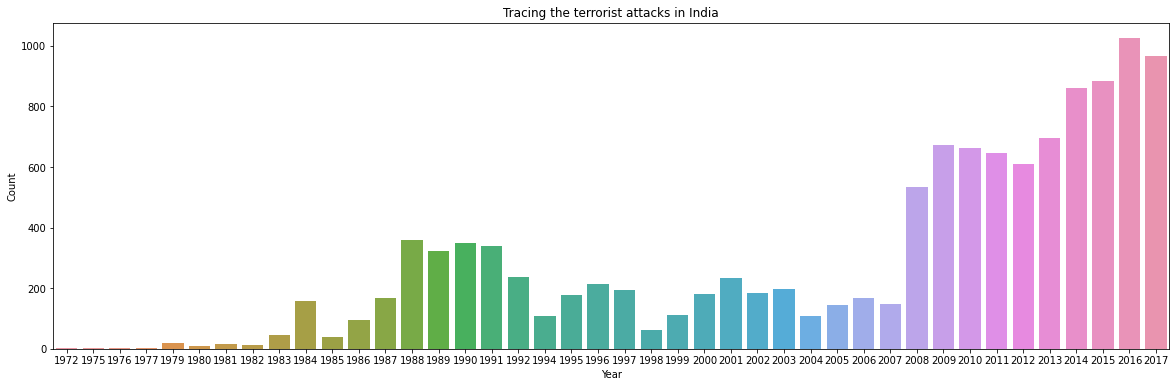

In [131]:
plt.figure(figsize=(20,6))
sns.barplot(y=India.Year.value_counts().values,x=India.Year.value_counts().index)
plt.title('Tracing the terrorist attacks in India')
plt.ylabel('Count')
plt.xlabel('Year')

**Insight**:- Since 2008 there has been an significant rise in the number of terror attempts in India.

In [132]:
India.City.value_counts().head(11)

Srinagar            658
Unknown             624
Imphal              426
New Delhi           157
Amritsar            138
Sopore              102
Ludhiana             77
Guwahati             77
Anantnag             76
Jammu                57
Latehar district     55
Name: City, dtype: int64

**Terror striken cities in India since 2017**

Text(0.5, 0, 'Count')

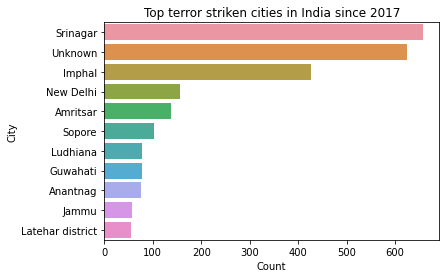

In [133]:
sns.barplot(x=India.City.value_counts().head(11).values,y=India.City.value_counts().head(11).index)
plt.title('Top terror striken cities in India since 2017')
plt.ylabel('City')
plt.xlabel('Count')

Insight: Srinagar in North and Imphal in Northeast are most affected by terrorist attack.

In [134]:
India[India.Year>=2008].City.value_counts().head(10)

Imphal                     388
Srinagar                   108
Unknown                    103
Sopore                      68
Latehar district            54
Bijapur district            50
Sukma district              49
West Midnapore district     41
Malkangiri district         40
Dantewada district          35
Name: City, dtype: int64

**Terror striken city in India from 2008**

Text(0.5, 0, 'City')

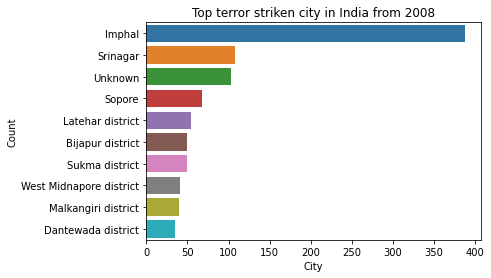

In [135]:
sns.barplot(x=India[India.Year>=2008].City.value_counts().head(10).values,y=India[India.Year>=2008].City.value_counts().head(10).index)
plt.title('Top terror striken city in India from 2008')
plt.ylabel('Count')
plt.xlabel('City')

**Insight**: Imphal in Northeast India has encountered lots of terror strikes in the last decades.

**Type of Attacks Employed**

Text(0.5, 0, 'Strike Mode')

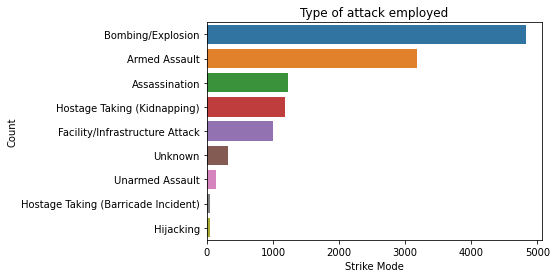

In [136]:
sns.barplot(x=India.AttackType.value_counts().values,y=India.AttackType.value_counts().index)
plt.title('Type of attack employed')
plt.ylabel('Count')
plt.xlabel('Strike Mode')

**Insight:** Bombing mode is employed widely by terrorist groups in India  followed by Armed assault. 

**Common target type in India**

Text(0, 0.5, 'Target')

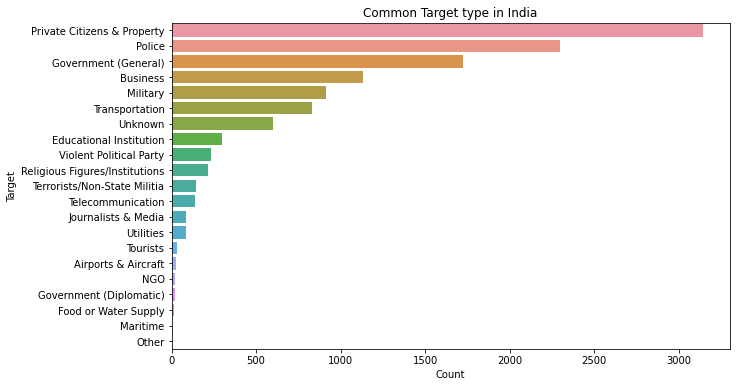

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x=India.Target_type.value_counts().values,y=India.Target_type.value_counts().index)
plt.title('Common Target type in India')
plt.xlabel('Count')
plt.ylabel('Target')

Insight: The common target in India remains nearly same as that of the world data except that Police forces are targeted more than Militray.

**Most Notorious group in India and Attack Types**

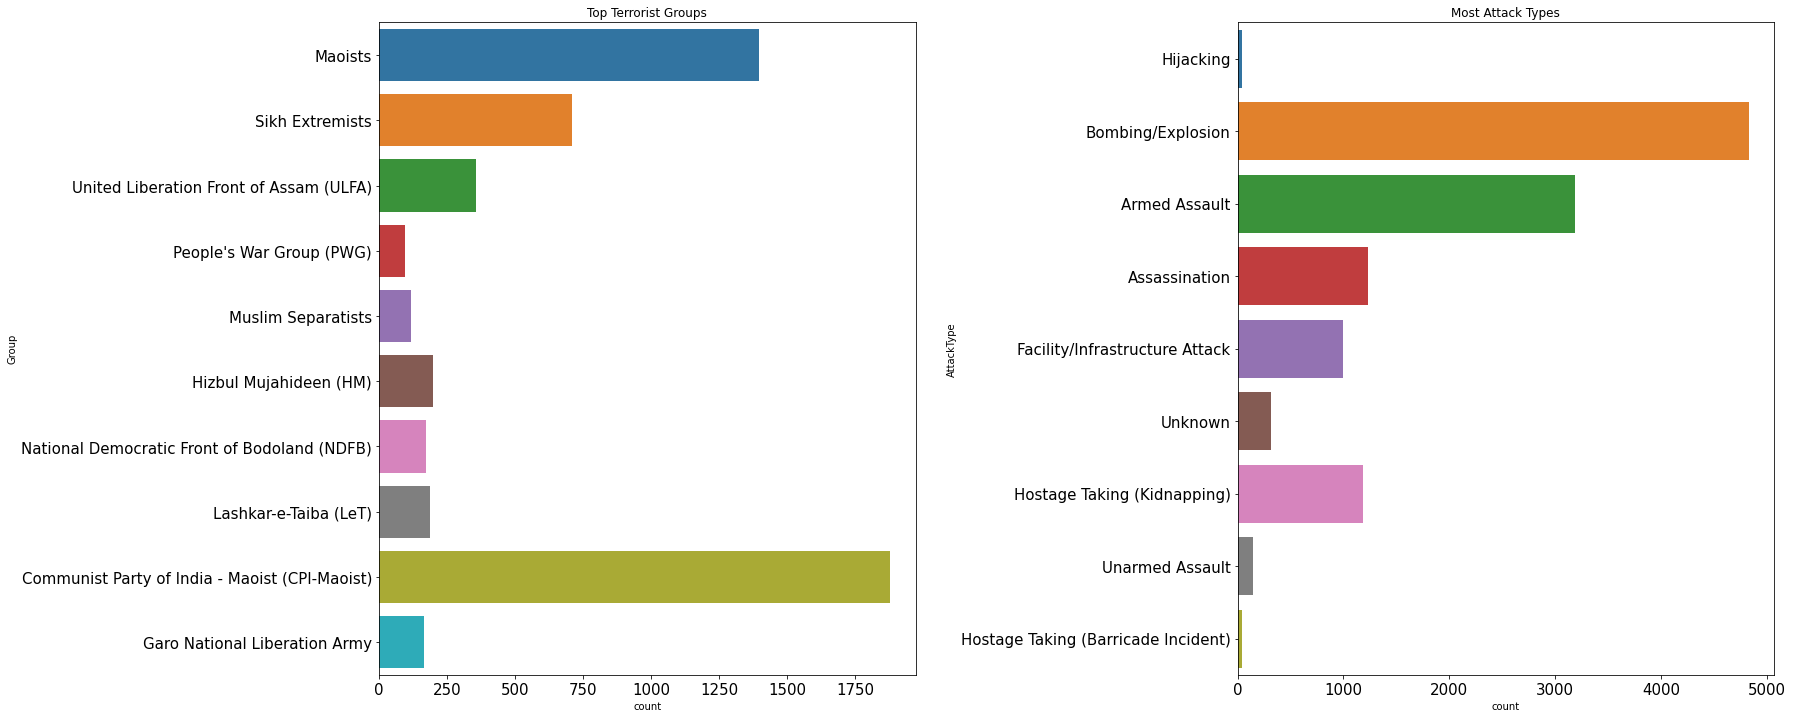

In [140]:
india_groups=terror_data[terror_data['Country']=='India']
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=india_groups['Group'].value_counts()[1:11].index
ind_groups=india_groups[india_groups['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=india_groups,ax=ax[1])
ax[1].set_title('Most Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

#RESULT:


*   Country with the most attack - Iraq
*   City with the most attack - Bagdad
*   Region with the most attack - Middle East & North America
*   Year with most attack and most killed - 2014
*   Month with most attack - May
*   Group with most attack - Taliban
*   Most of te attack were not even recognized by any group
*   most attack type- Bombing/Explosion
*   Country with maximum people killed - Afganistan
*   Terror type which killed the most- Armed assualt











**Remark**

Terrorism not only paved an impact on the life and property but also create fear and terror among the people.Note what are the most notorious groups of India are and how they attack.

**Facts to Know**

India has witnessed several terrorist attacks so far.But there are 8 major attacks that shook the India and their people are

1. Bombay blast in 1993
2. Parliament Attack in 2001
3. Delhi Bomb blast in 2005
4. Mumbai Train Bombings 2006
5. Jaipur blasts in 2008
6. 26/11 Mumbai Attack in 2008
7. Uri Attack in 2016
8. Pulwama Attack in 2019

# Conclusion

Here i have come to the end of this project on the topic "Global Terrorism Analysis".
To conclude,I have seen various types of analysis and question and answers with the dataset which i found interesting.Here is something i feel worth to share.We just look at data set all we can say is that we just know what are the columns and what it's contains.So EDA is a very efficient way to make our work easy.With python libraries like pandas,numpy,matplotlib,seaborn allow us to come to conclusions and visualization. 